In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

# Data Preparation

In [2]:
#loading data set

train_data = pd.read_csv('train.csv')

In [3]:
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
#print the null value index in sc_h  and  sc_w

fc = train_data[train_data['fc'].isnull()].index
four_g = train_data[train_data['four_g'].isnull()].index
pc = train_data[train_data['pc'].isnull()].index
m_dep = train_data[train_data['m_dep'].isnull()].index
int_memory = train_data[train_data['int_memory'].isnull()].index
null_sc_h = train_data[train_data['sc_h'].isnull()].index
null_sc_w = train_data[train_data['sc_w'].isnull()].index

print(f"Null values in sc_h: {null_sc_h}")
print(f"Null values in sc_w: {null_sc_w}")
print(f"Null values in m_dep: {m_dep}")
print(f"Null values in pc: {pc}")
print(f"Null values in int_memory: {int_memory}")
print(f"Null values in fc: {fc}")
print(f"Null values in four_g: {four_g}")


Null values in sc_h: Index([341], dtype='int64')
Null values in sc_w: Index([341], dtype='int64')
Null values in m_dep: Index([157, 158, 217, 261, 371], dtype='int64')
Null values in pc: Index([157, 158, 261, 292, 293], dtype='int64')
Null values in int_memory: Index([157, 158, 261, 276, 371], dtype='int64')
Null values in fc: Index([157, 158, 261, 276, 371], dtype='int64')
Null values in four_g: Index([157, 158, 261, 276, 371], dtype='int64')


In [6]:
print(train_data.loc[157])

battery_power    1224.0
blue                0.0
clock_speed         0.5
dual_sim            0.0
fc                  NaN
four_g              NaN
int_memory          NaN
m_dep               NaN
mobile_wt           NaN
n_cores             NaN
pc                  NaN
px_height         747.0
px_width          826.0
ram               506.0
sc_h               10.0
sc_w                0.0
talk_time          11.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         0.0
Name: 157, dtype: float64


In [7]:
#count number of ones ansfour_g

train_data['four_g'].value_counts()


four_g
1.0    1040
0.0     955
Name: count, dtype: int64

In [8]:
#it is better to fill null values of binary column with the most freq. occur
#in this dataset the only binary column having null values is four_g
#fill null with 1 as it is the most freq occured
train_data['four_g'] = train_data['four_g'].fillna(1)

In [9]:
# print row 341 in train_data

print(train_data.loc[341])


battery_power    811.0
blue               1.0
clock_speed        2.4
dual_sim           1.0
fc                 5.0
four_g             1.0
int_memory         2.0
m_dep              0.3
mobile_wt        106.0
n_cores            6.0
pc                13.0
px_height          NaN
px_width           NaN
ram                NaN
sc_h               NaN
sc_w               NaN
talk_time          2.0
three_g            1.0
touch_screen       0.0
wifi               1.0
price_range        1.0
Name: 341, dtype: float64


In [10]:
# count number of 0s,1s,2s,3s in price range

price_range_counts = train_data['price_range'].value_counts()

# Print the counts
print(price_range_counts)


price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [11]:
#KNNImputer finds the 5 nearest neighbors and fills the missing value with the mean of these neighbors.
# Assume df is your DataFrame and it has missing values
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(train_data)
df_filled = pd.DataFrame(df_filled, columns=train_data.columns)


In [12]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   float64
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   float64
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   float64
 18  touch_sc

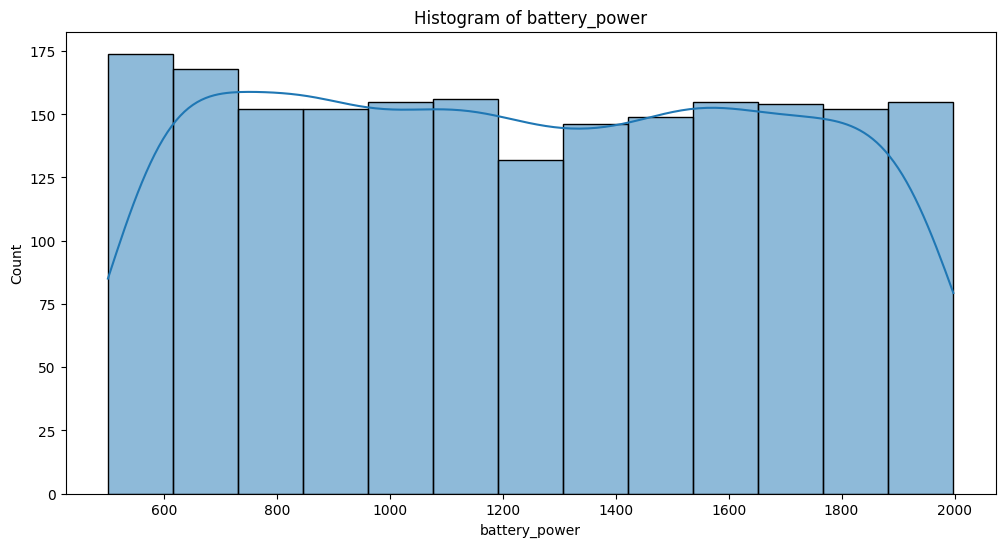

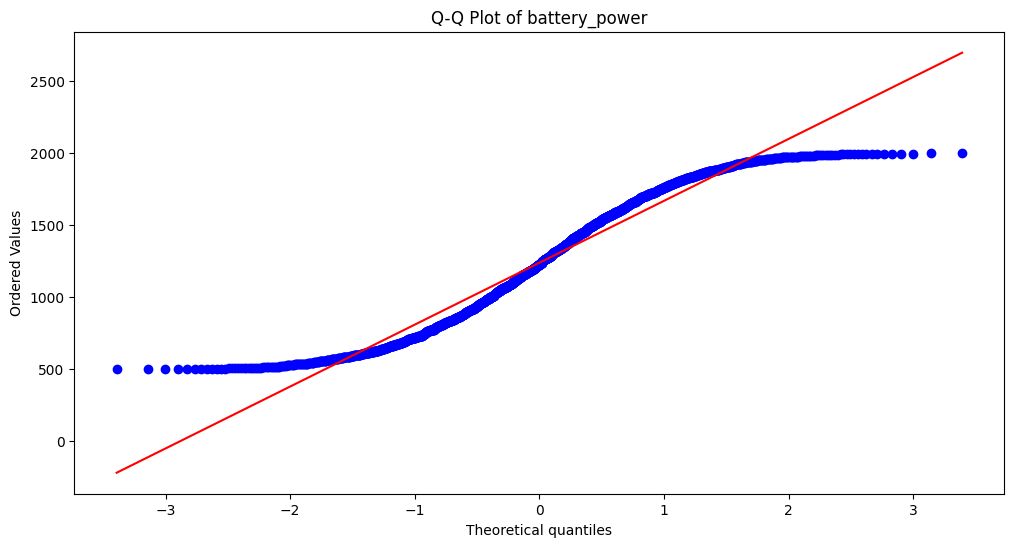

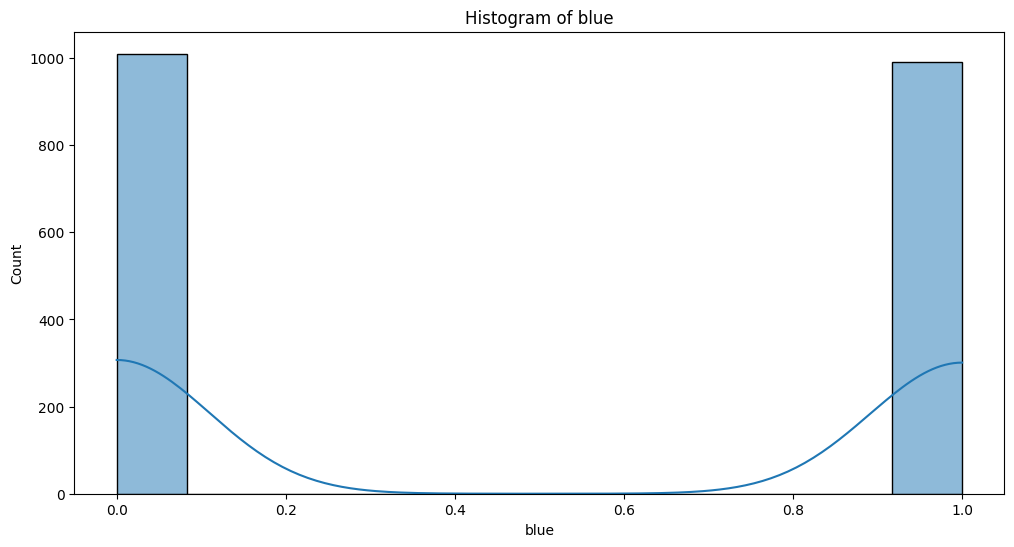

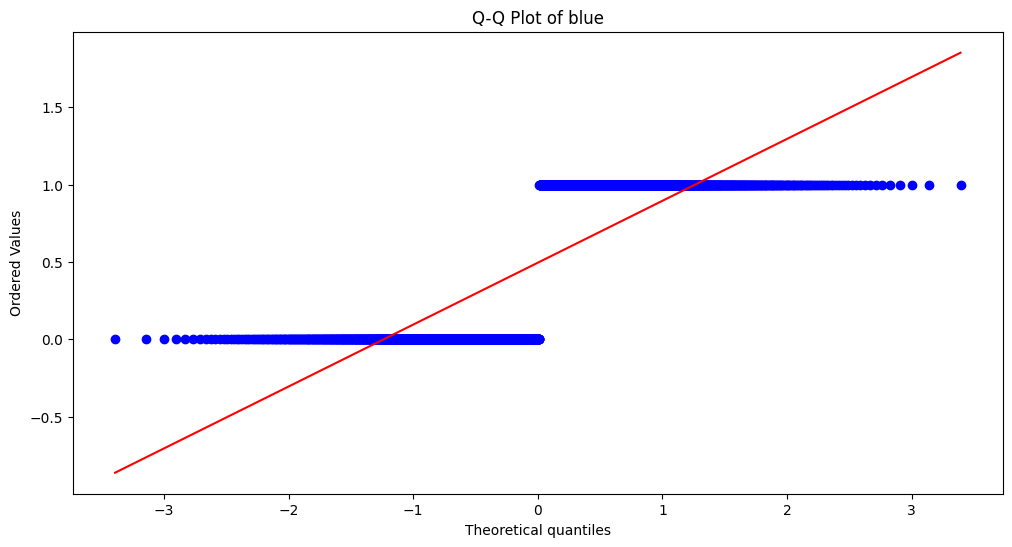

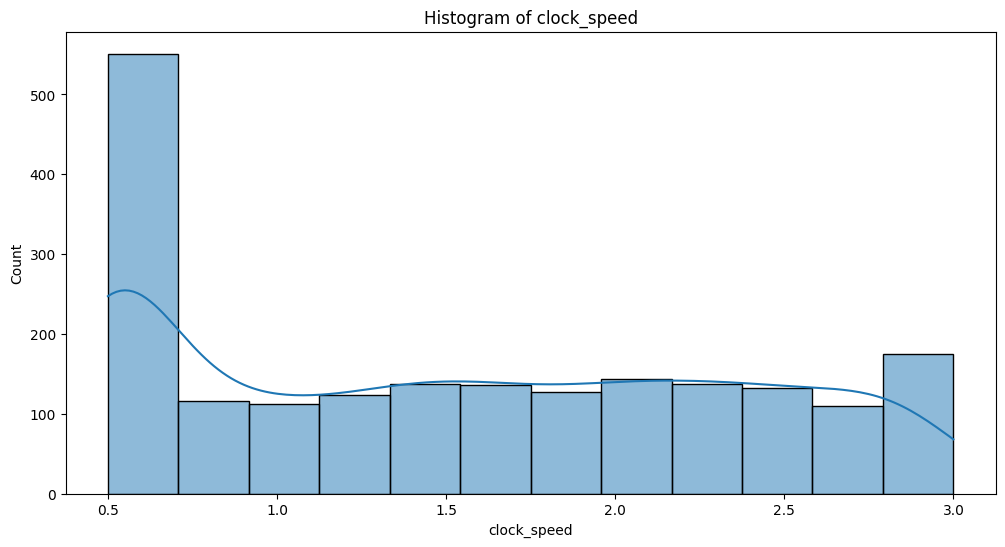

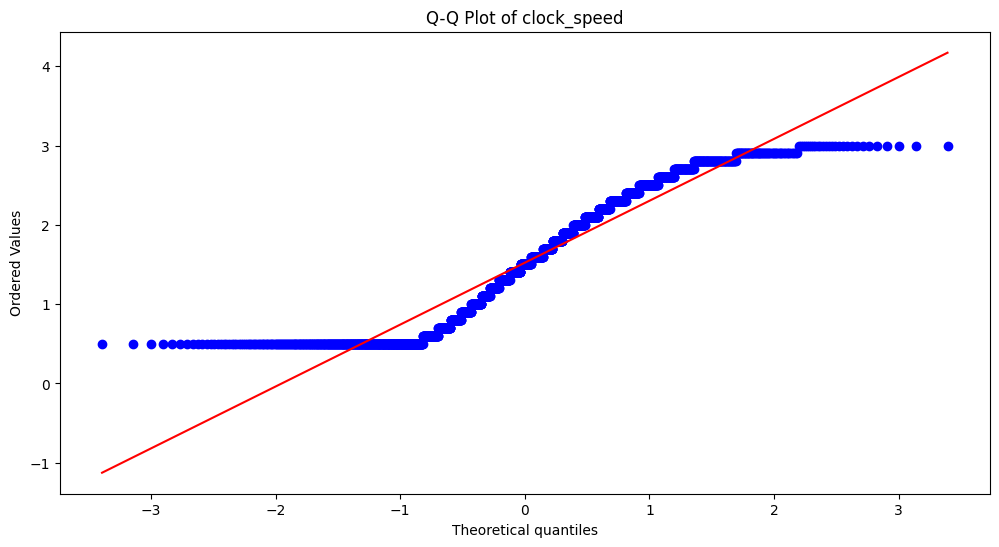

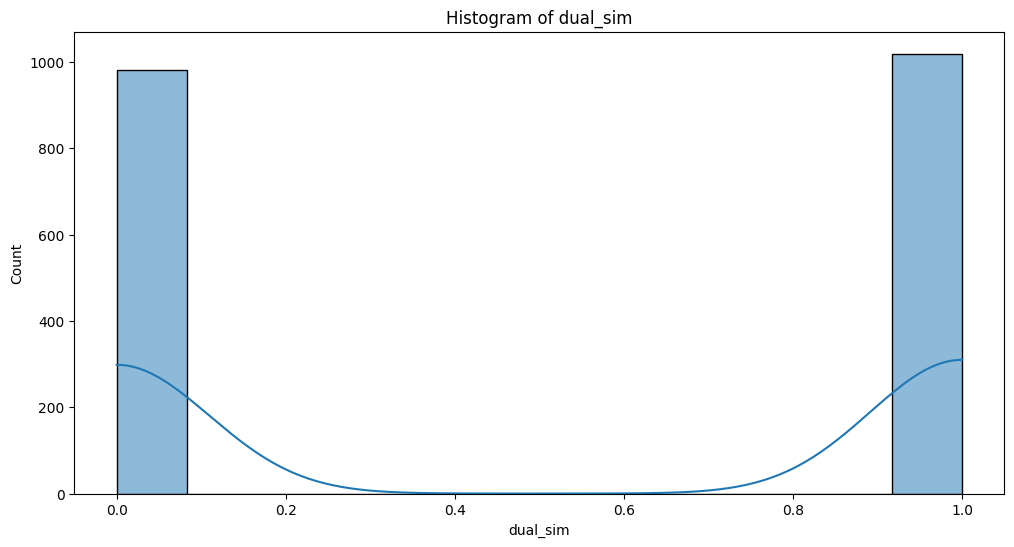

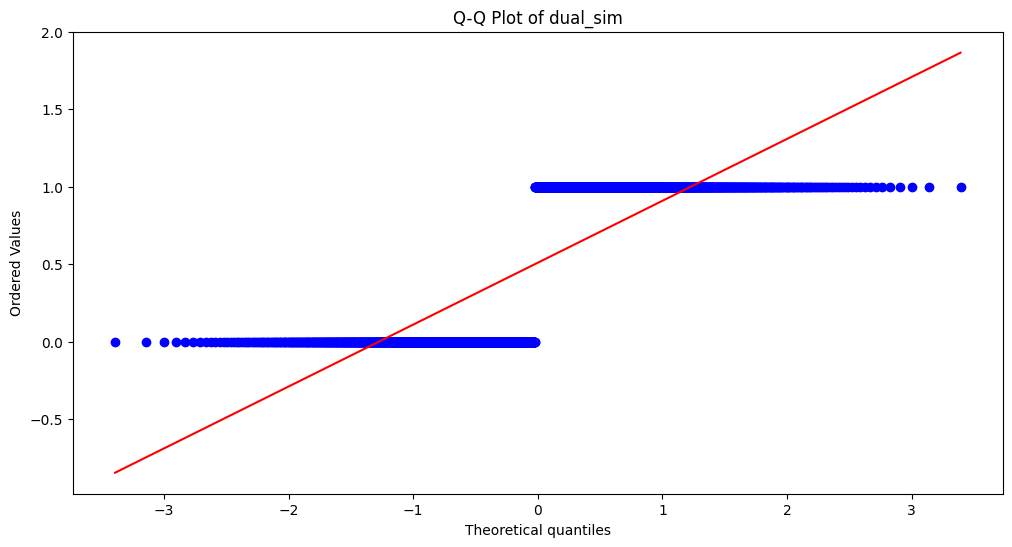

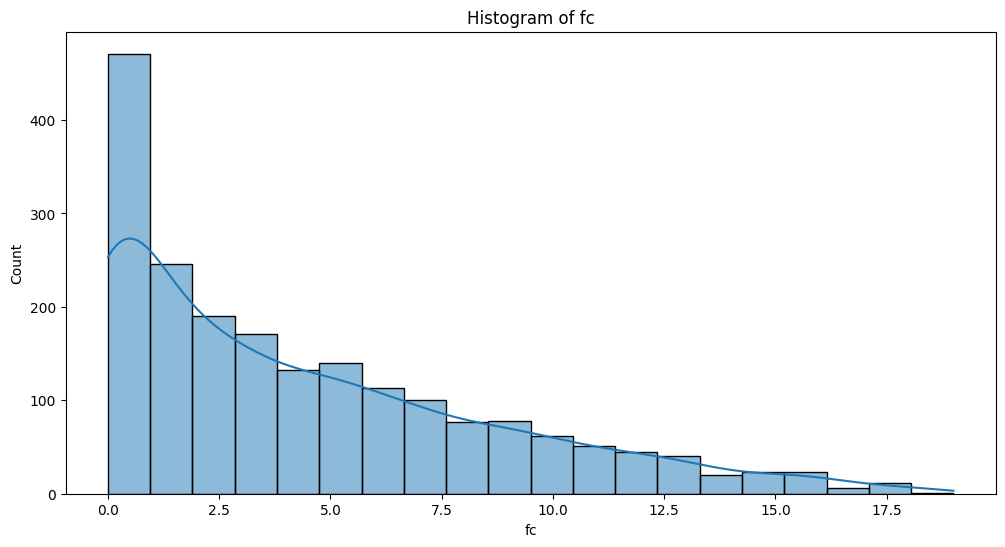

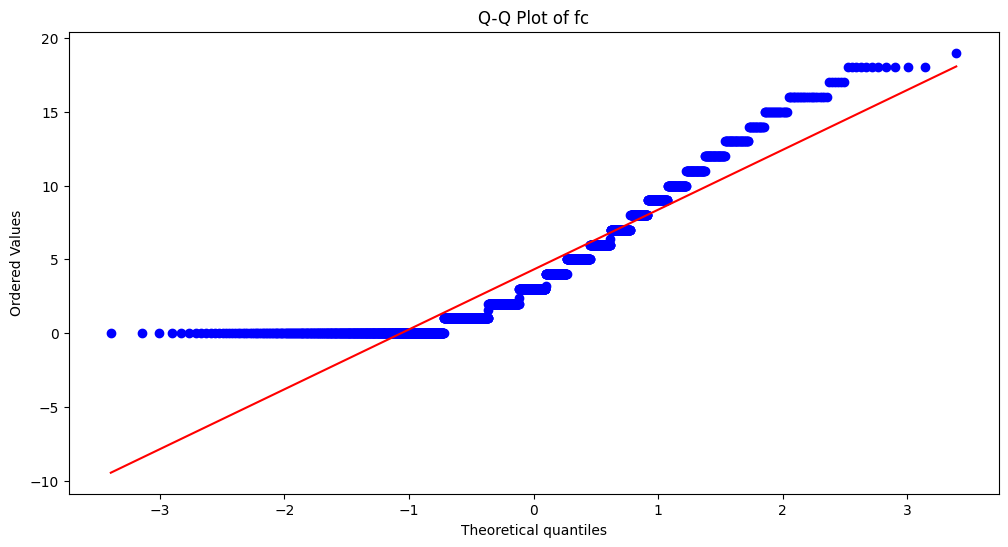

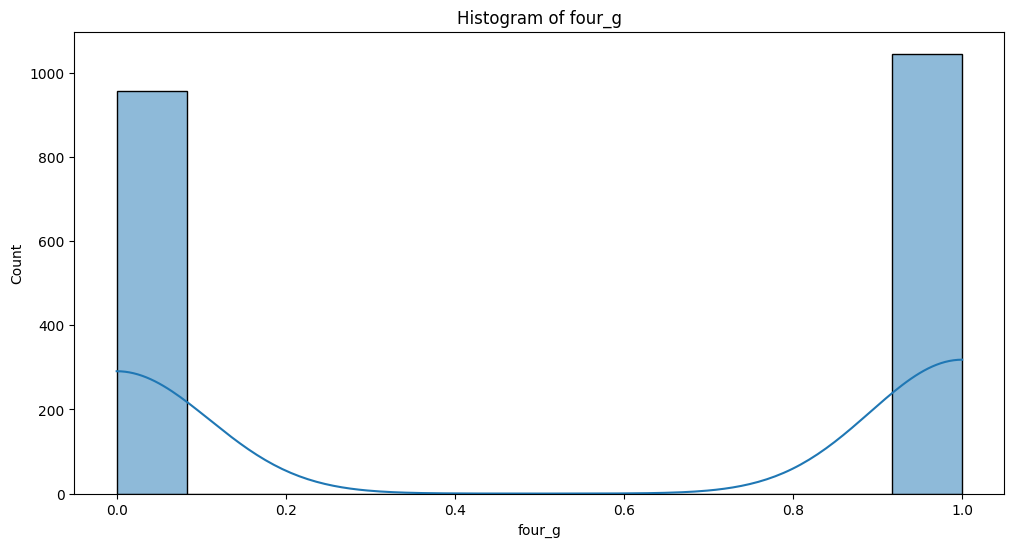

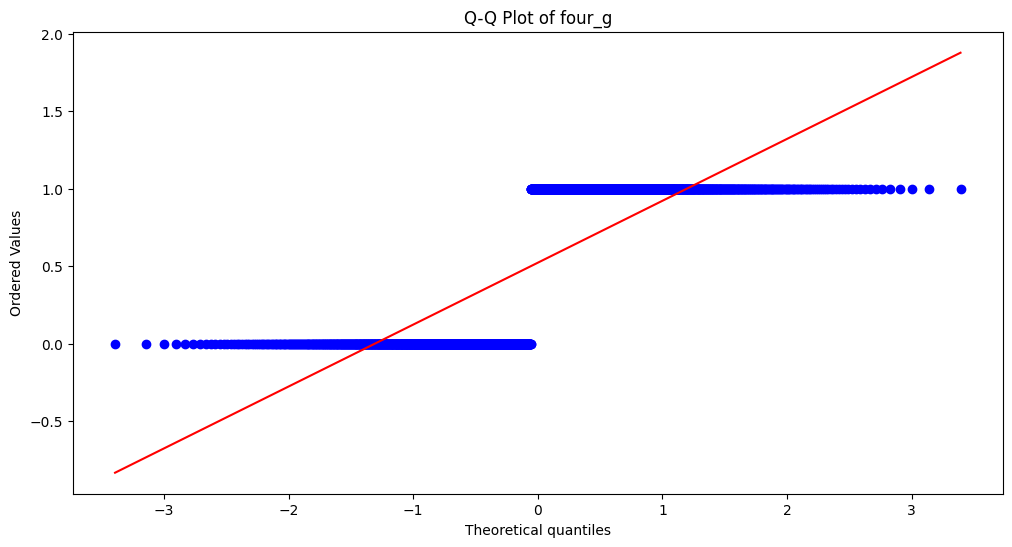

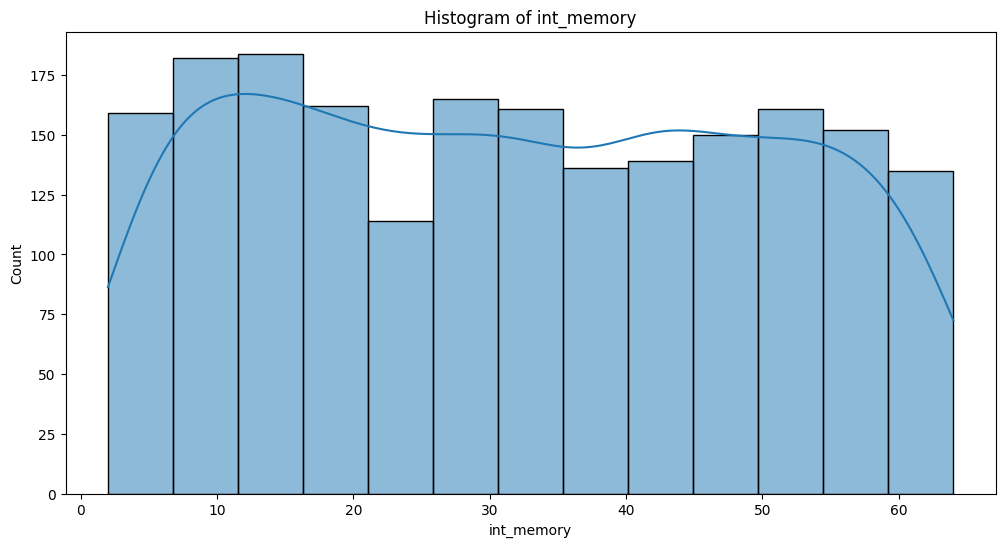

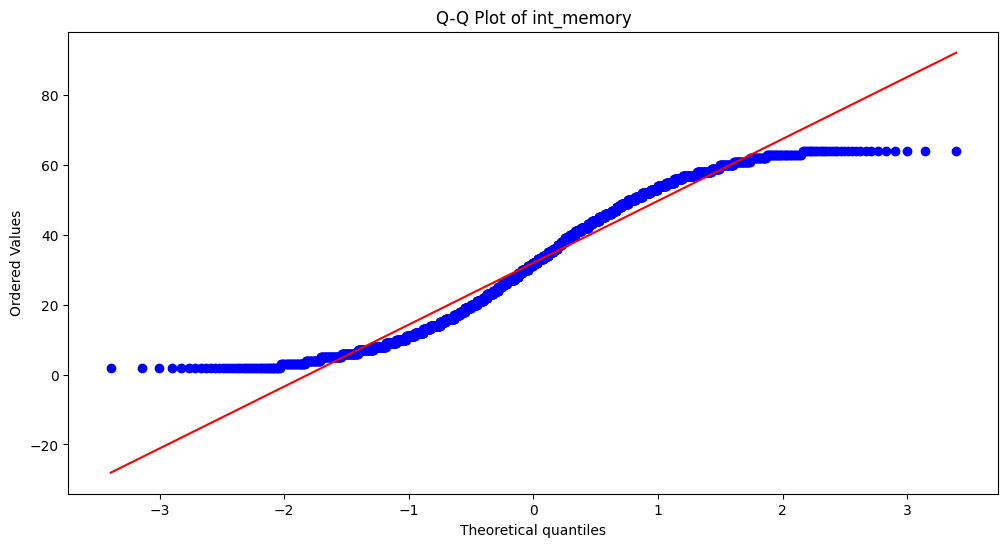

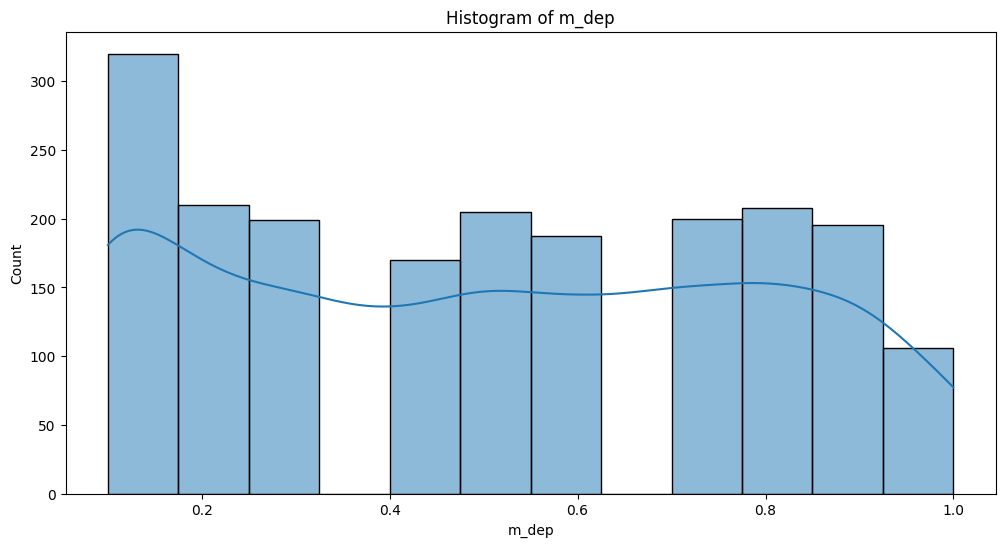

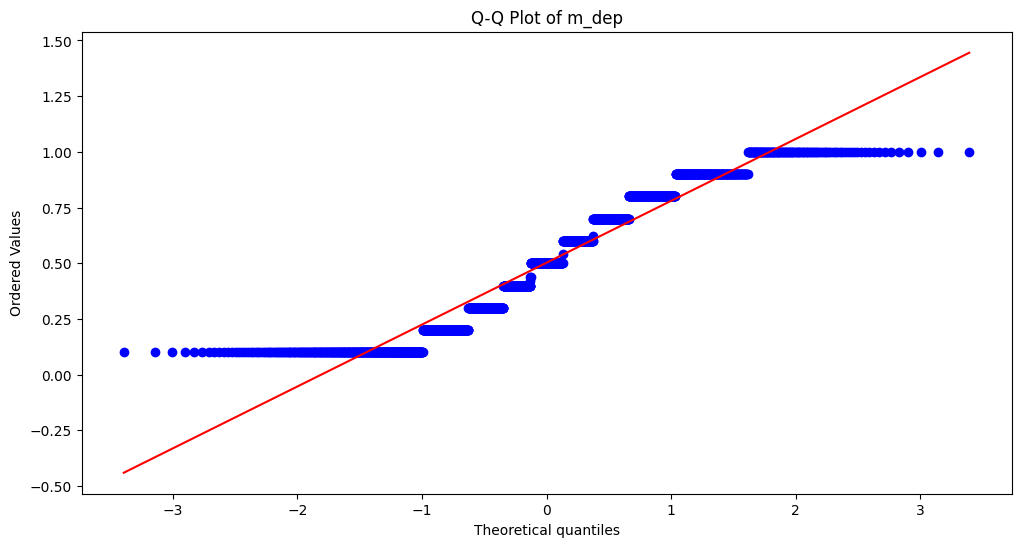

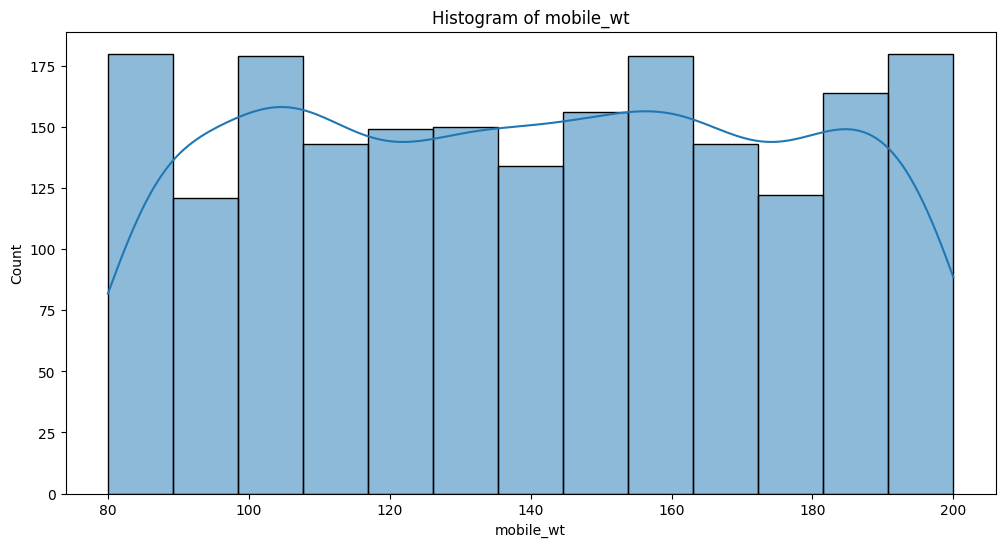

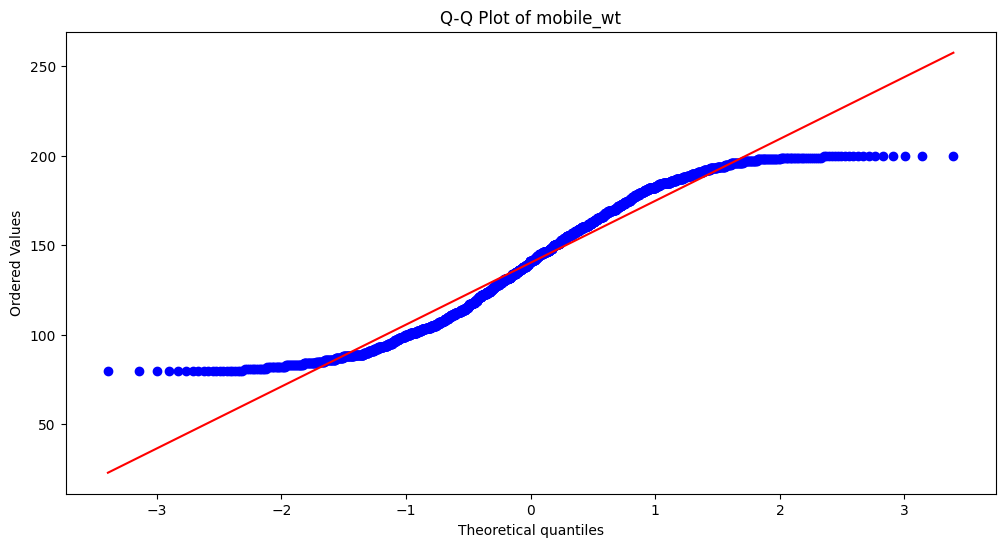

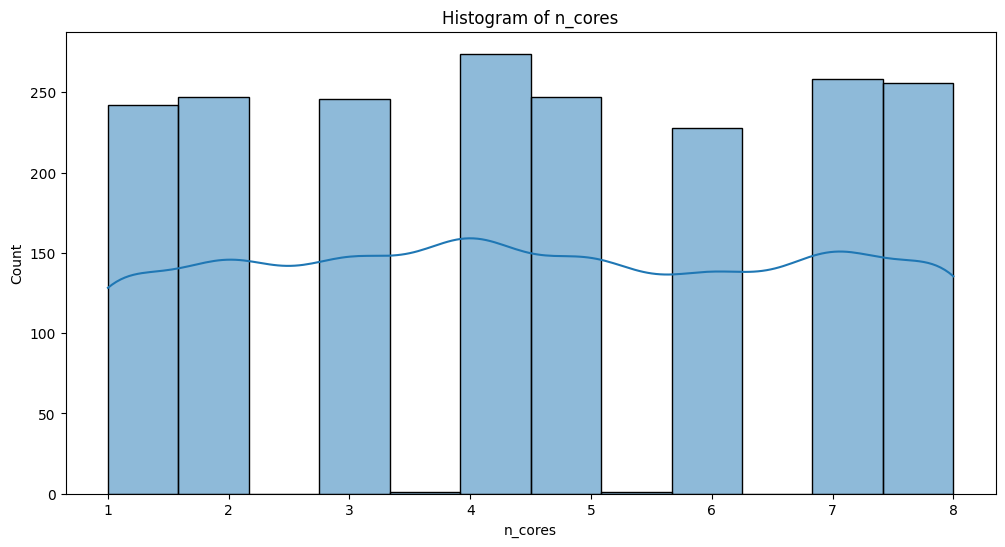

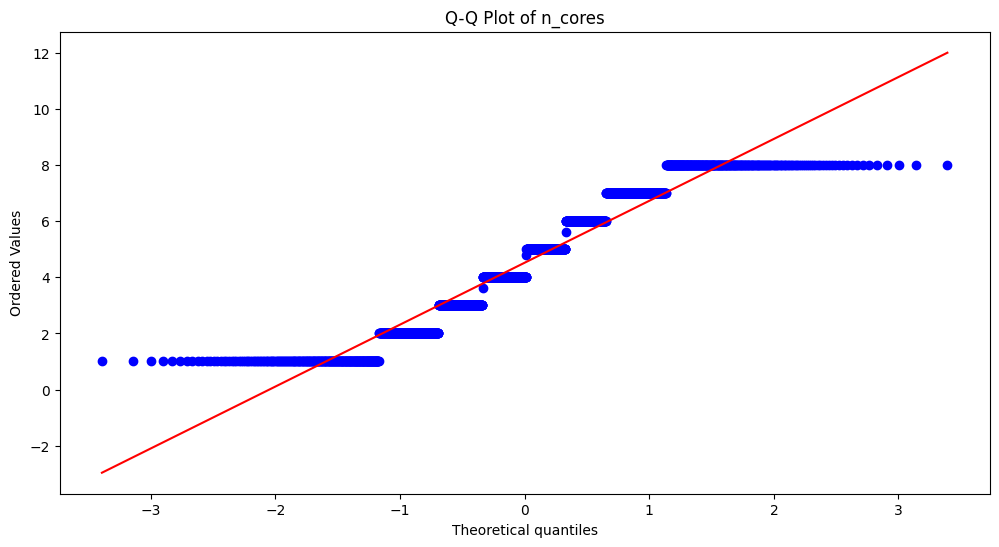

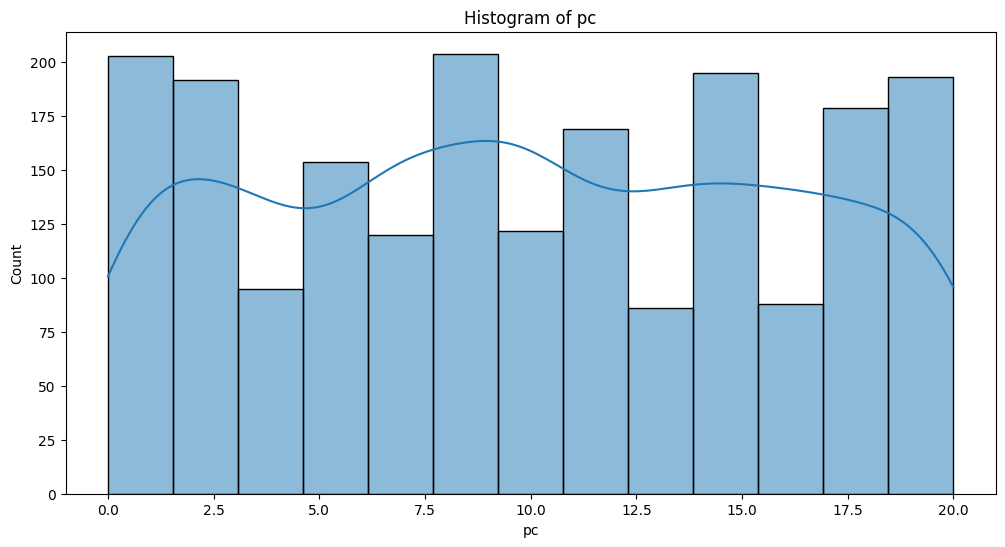

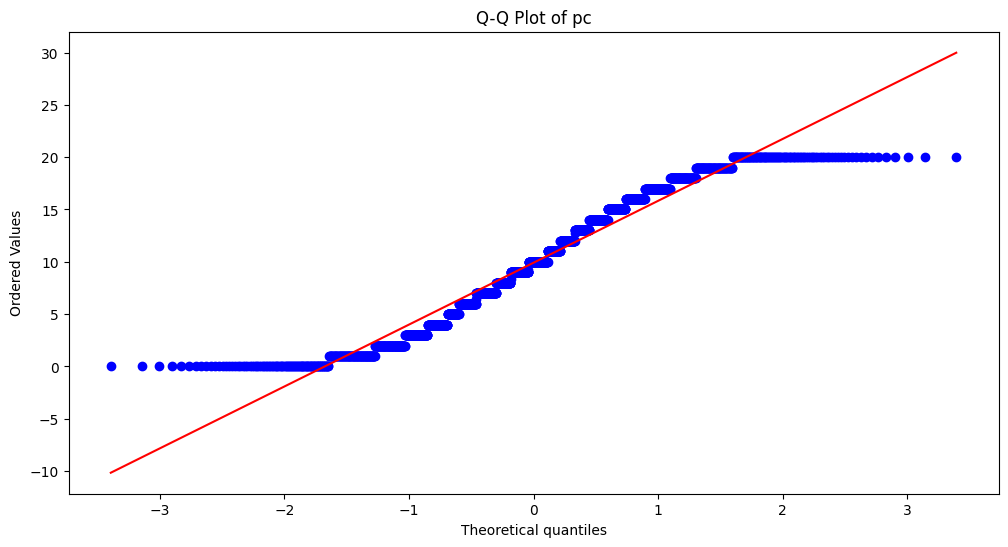

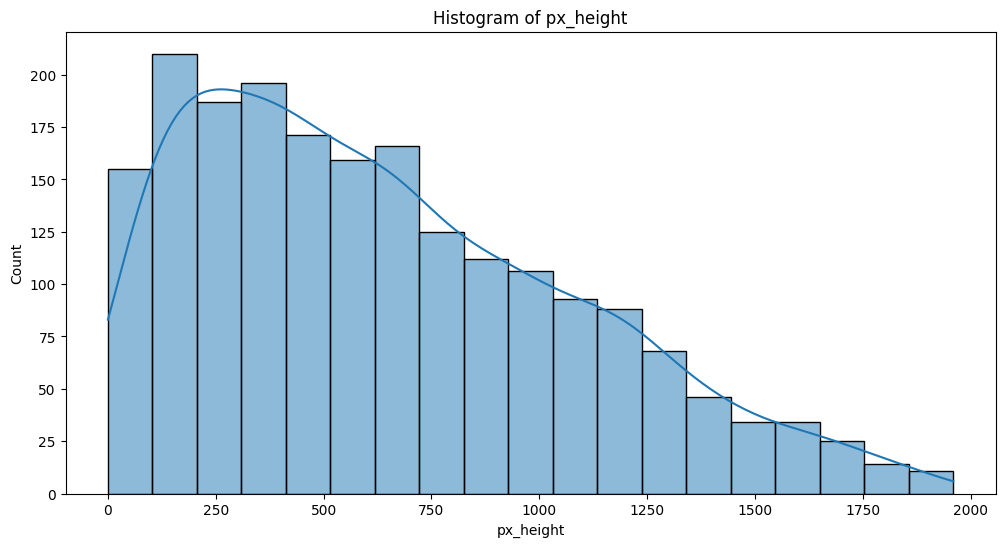

In [ ]:
# plot all my train_data columns using histogram and Q-Q plot

# Histogram and Q-Q Plot for all columns in train_data

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Iterate over all columns in train_data
for column in df_filled.columns:
    # Histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(df_filled[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

    # Q-Q Plot
    plt.figure(figsize=(12, 6))
    stats.probplot(df_filled[column], plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()


In [14]:
# get the correlation between all columns and column price_range

price_range_correlation = df_filled.corr()['price_range'].sort_values(ascending=False)
print(price_range_correlation)


price_range      1.000000
ram              0.916730
battery_power    0.200723
px_width         0.166186
px_height        0.147913
int_memory       0.041583
sc_w             0.038763
pc               0.035110
fc               0.024270
three_g          0.023611
sc_h             0.023294
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.015668
n_cores          0.004577
m_dep           -0.000295
clock_speed     -0.006606
touch_screen    -0.030411
mobile_wt       -0.033106
Name: price_range, dtype: float64


**RAM Importance:** RAM has a very strong positive correlation with price range. Focus on RAM as a key feature in predicting device price.
**Battery Power**: Battery power has a positive correlation, though not as strong as RAM. It’s still an important feature to consider.
**Screen Size:** Both pixel width and height show positive correlations, indicating that larger screen sizes may contribute to a higher price.
**Negative Features:** Features like touch screen and mobile weight have negative correlations, suggesting they might contribute to a lower price range.

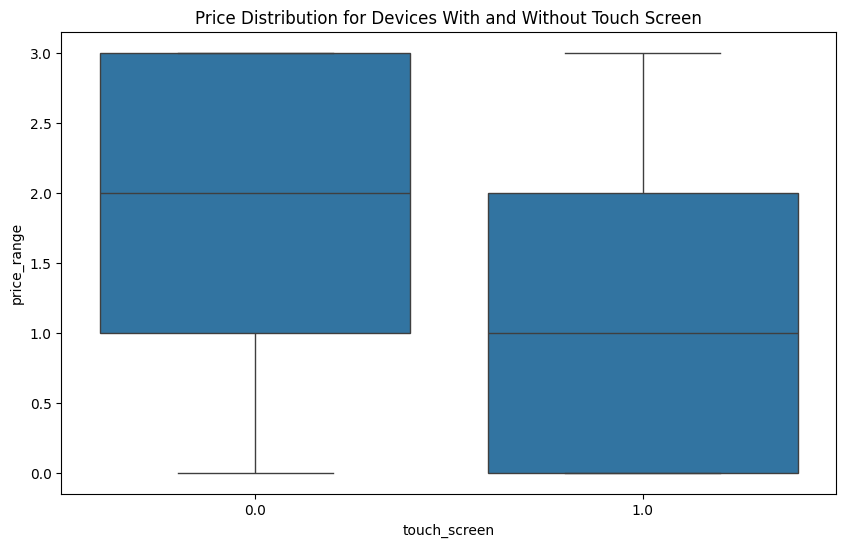

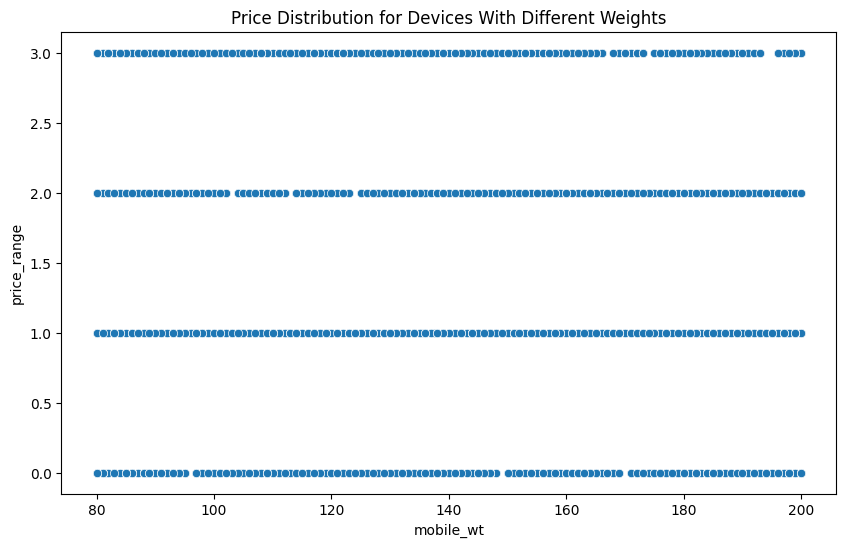

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame

# For touch screen feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='touch_screen', y='price_range', data=df_filled)
plt.title('Price Distribution for Devices With and Without Touch Screen')
plt.show()

# For mobile weight feature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mobile_wt', y='price_range', data=df_filled)
plt.title('Price Distribution for Devices With Different Weights')
plt.show()


In [16]:
df_filled.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.308800,0.522500,32.044400,0.502230,140.279500,4.518000,...,644.945300,1251.177800,2124.744500,12.30370,5.766500,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.331326,0.499618,18.128339,0.288195,35.356386,2.286913,...,443.156051,432.150585,1084.846334,4.21132,4.356313,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.00000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,565.500000,1247.000000,2149.000000,12.00000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.00000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.00000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
df_filled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0.0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2.0
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3.0
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0.0


In [ ]:
#drop four_g and pc
#as four_g is not highly correlated with price range as the three_g
df_filled = df_filled.drop(columns=['four_g', 'pc'])


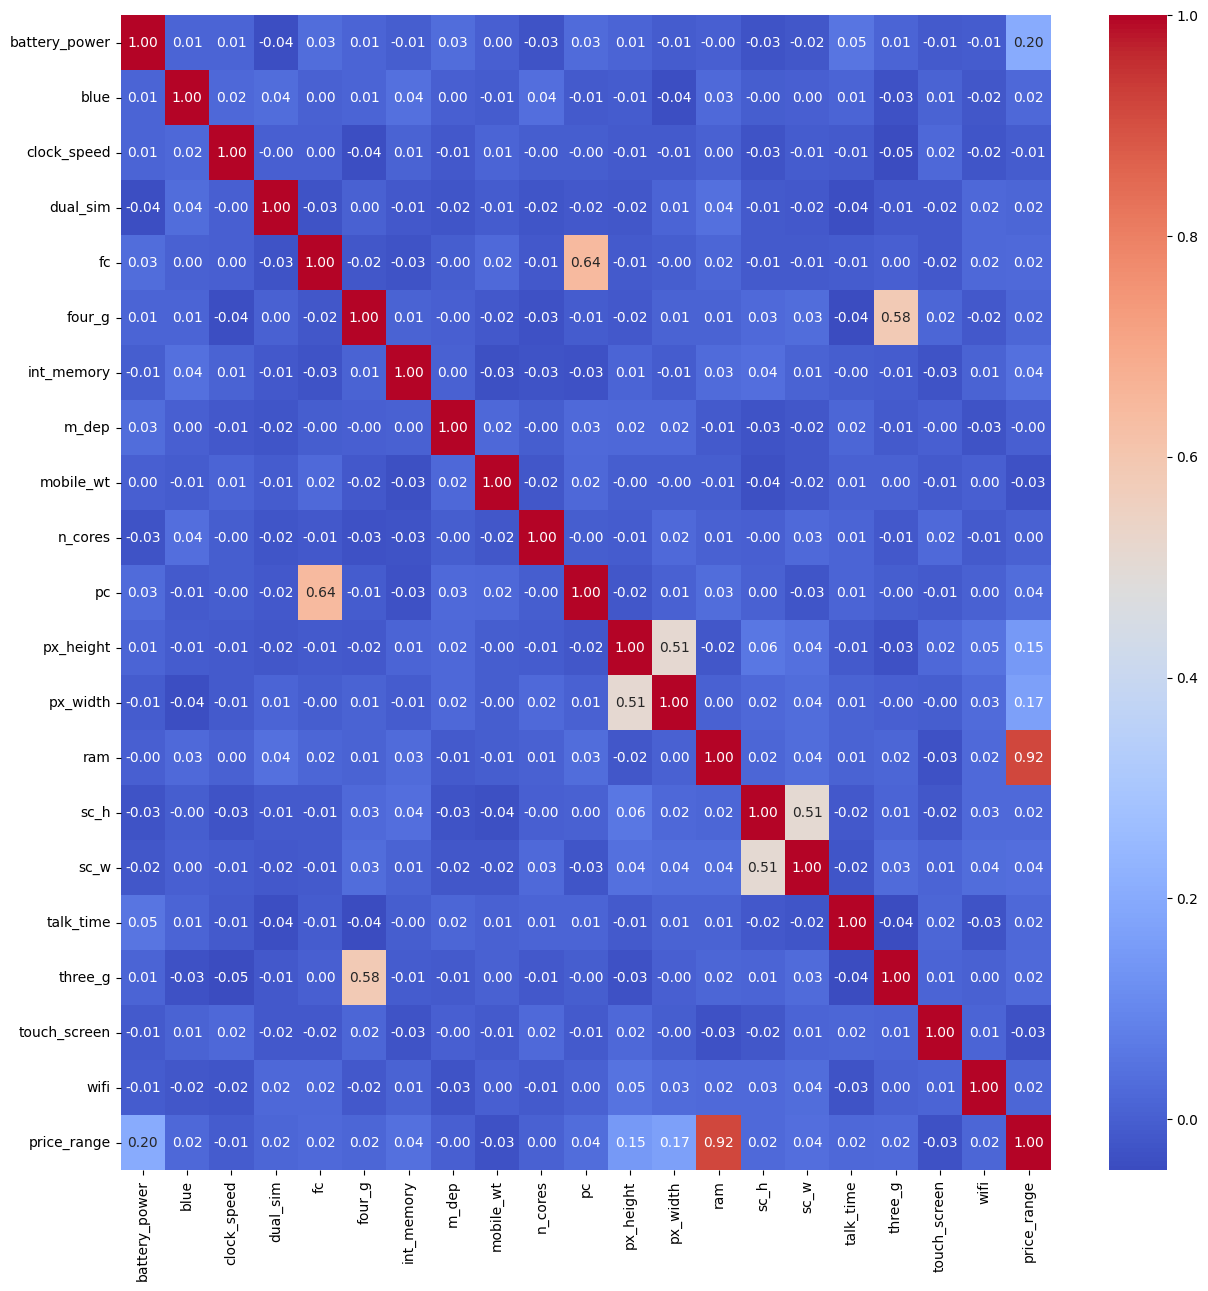

In [18]:
# plot correlation between all features and each other in a big size

import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
corr_matrix = df_filled.corr()

# Set up the figure size
plt.figure(figsize=(15, 15))

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Display the heatmap
plt.show()


In [ ]:
# get the correlation between all columns and column price_range

price_range_correlation = df_filled.corr()['price_range'].sort_values(ascending=False)
print(price_range_correlation)


In [20]:
# Create a new feature 'screen_area_cm' from 'sc_h' and 'sc_w'
df_filled['screen_area_cm'] = df_filled['sc_h'] * df_filled['sc_w']

# Create a new feature 'pixel_area' from 'px_height' and 'px_width'
df_filled['pixel_area'] = df_filled['px_height'] * df_filled['px_width']


In [21]:
df_filled.describe()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,px_height,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_area_cm,pixel_area
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2.000000e+03
mean,1238.518500,0.4950,1.522250,0.509500,4.308800,32.044400,0.502230,140.279500,4.518000,644.945300,...,2124.744500,12.30370,5.766500,11.011000,0.761500,0.503000,0.507000,1.500000,80.23120,9.046195e+05
std,439.418206,0.5001,0.816004,0.500035,4.331326,18.128339,0.288195,35.356386,2.286913,443.156051,...,1084.846334,4.21132,4.356313,5.463955,0.426273,0.500116,0.500076,1.118314,76.81745,8.282310e+05
min,501.000000,0.0000,0.500000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,...,256.000000,5.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00
25%,851.750000,0.0000,0.700000,0.000000,1.000000,16.000000,0.200000,109.000000,3.000000,282.750000,...,1207.500000,9.00000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000,19.00000,2.632005e+05
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,32.000000,0.500000,141.000000,4.000000,565.500000,...,2149.000000,12.00000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000,55.00000,6.040320e+05
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,48.000000,0.800000,170.000000,7.000000,947.250000,...,3064.500000,16.00000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000,120.00000,1.359027e+06
max,1998.000000,1.0000,3.000000,1.000000,19.000000,64.000000,1.000000,200.000000,8.000000,1960.000000,...,3998.000000,19.00000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000,342.00000,3.886306e+06


In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# For Min-Max Scaling

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_filled)


In [25]:
X_scaled

array([[0.22778891, 0.        , 0.68      , ..., 0.33333333, 0.18421053,
        0.00389058],
       [0.34736139, 1.        , 0.        , ..., 0.66666667, 0.14912281,
        0.46294347],
       [0.04141617, 1.        , 0.        , ..., 0.66666667, 0.06432749,
        0.55767817],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 0.02631579,
        0.36450449],
       [0.6753507 , 0.        , 0.16      , ..., 0.        , 0.52631579,
        0.05792647],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 0.22222222,
        0.09370904]])

In [26]:
# Assume X is your feature matrix and df is your original DataFrame

# For Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_filled)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=df_filled.columns)

# For Standard Scaling
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
#X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [27]:
X_scaled_df

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,px_height,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_area_cm,pixel_area
0,0.227789,0.0,0.68,0.0,0.052632,0.080645,0.555556,0.900000,0.142857,0.010204,...,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0.333333,0.184211,0.003891
1,0.347361,1.0,0.00,1.0,0.000000,0.822581,0.666667,0.466667,0.285714,0.461735,...,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,0.666667,0.149123,0.462943
2,0.041416,1.0,0.00,1.0,0.105263,0.629032,0.888889,0.541667,0.571429,0.644388,...,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,0.666667,0.064327,0.557678
3,0.076152,1.0,0.80,0.0,0.000000,0.129032,0.777778,0.425000,0.714286,0.620408,...,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0.666667,0.374269,0.558828
4,0.881764,1.0,0.28,0.0,0.684211,0.677419,0.555556,0.508333,0.142857,0.616327,...,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,0.333333,0.046784,0.376732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,0.000000,0.777778,0.216667,0.714286,0.623469,...,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,0.000000,0.152047,0.594287
1996,0.977956,1.0,0.84,1.0,0.000000,0.596774,0.111111,0.891667,0.428571,0.466837,...,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,0.666667,0.321637,0.462644
1997,0.941884,0.0,0.16,1.0,0.052632,0.548387,0.666667,0.233333,1.000000,0.442857,...,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,1.000000,0.026316,0.364504
1998,0.675351,0.0,0.16,0.0,0.210526,0.709677,0.000000,0.541667,0.571429,0.171429,...,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,0.000000,0.526316,0.057926


In [28]:
# drop sc_h and sc_w and px_height and px_width

X_scaled_df = X_scaled_df.drop(columns=['sc_h', 'sc_w', 'px_height', 'px_width'])

X_scaled_df

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,ram,talk_time,three_g,touch_screen,wifi,price_range,screen_area_cm,pixel_area
0,0.227789,0.0,0.68,0.0,0.052632,0.080645,0.555556,0.900000,0.142857,0.612774,0.944444,0.0,0.0,1.0,0.333333,0.184211,0.003891
1,0.347361,1.0,0.00,1.0,0.000000,0.822581,0.666667,0.466667,0.285714,0.634687,0.277778,1.0,1.0,0.0,0.666667,0.149123,0.462943
2,0.041416,1.0,0.00,1.0,0.105263,0.629032,0.888889,0.541667,0.571429,0.627205,0.388889,1.0,1.0,0.0,0.666667,0.064327,0.557678
3,0.076152,1.0,0.80,0.0,0.000000,0.129032,0.777778,0.425000,0.714286,0.671566,0.500000,1.0,0.0,0.0,0.666667,0.374269,0.558828
4,0.881764,1.0,0.28,0.0,0.684211,0.677419,0.555556,0.508333,0.142857,0.308658,0.722222,1.0,1.0,0.0,0.333333,0.046784,0.376732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,0.000000,0.777778,0.216667,0.714286,0.110102,0.944444,1.0,1.0,0.0,0.000000,0.152047,0.594287
1996,0.977956,1.0,0.84,1.0,0.000000,0.596774,0.111111,0.891667,0.428571,0.474613,0.777778,1.0,1.0,1.0,0.666667,0.321637,0.462644
1997,0.941884,0.0,0.16,1.0,0.052632,0.548387,0.666667,0.233333,1.000000,0.748530,0.166667,1.0,1.0,0.0,1.000000,0.026316,0.364504
1998,0.675351,0.0,0.16,0.0,0.210526,0.709677,0.000000,0.541667,0.571429,0.163816,0.944444,1.0,1.0,1.0,0.000000,0.526316,0.057926


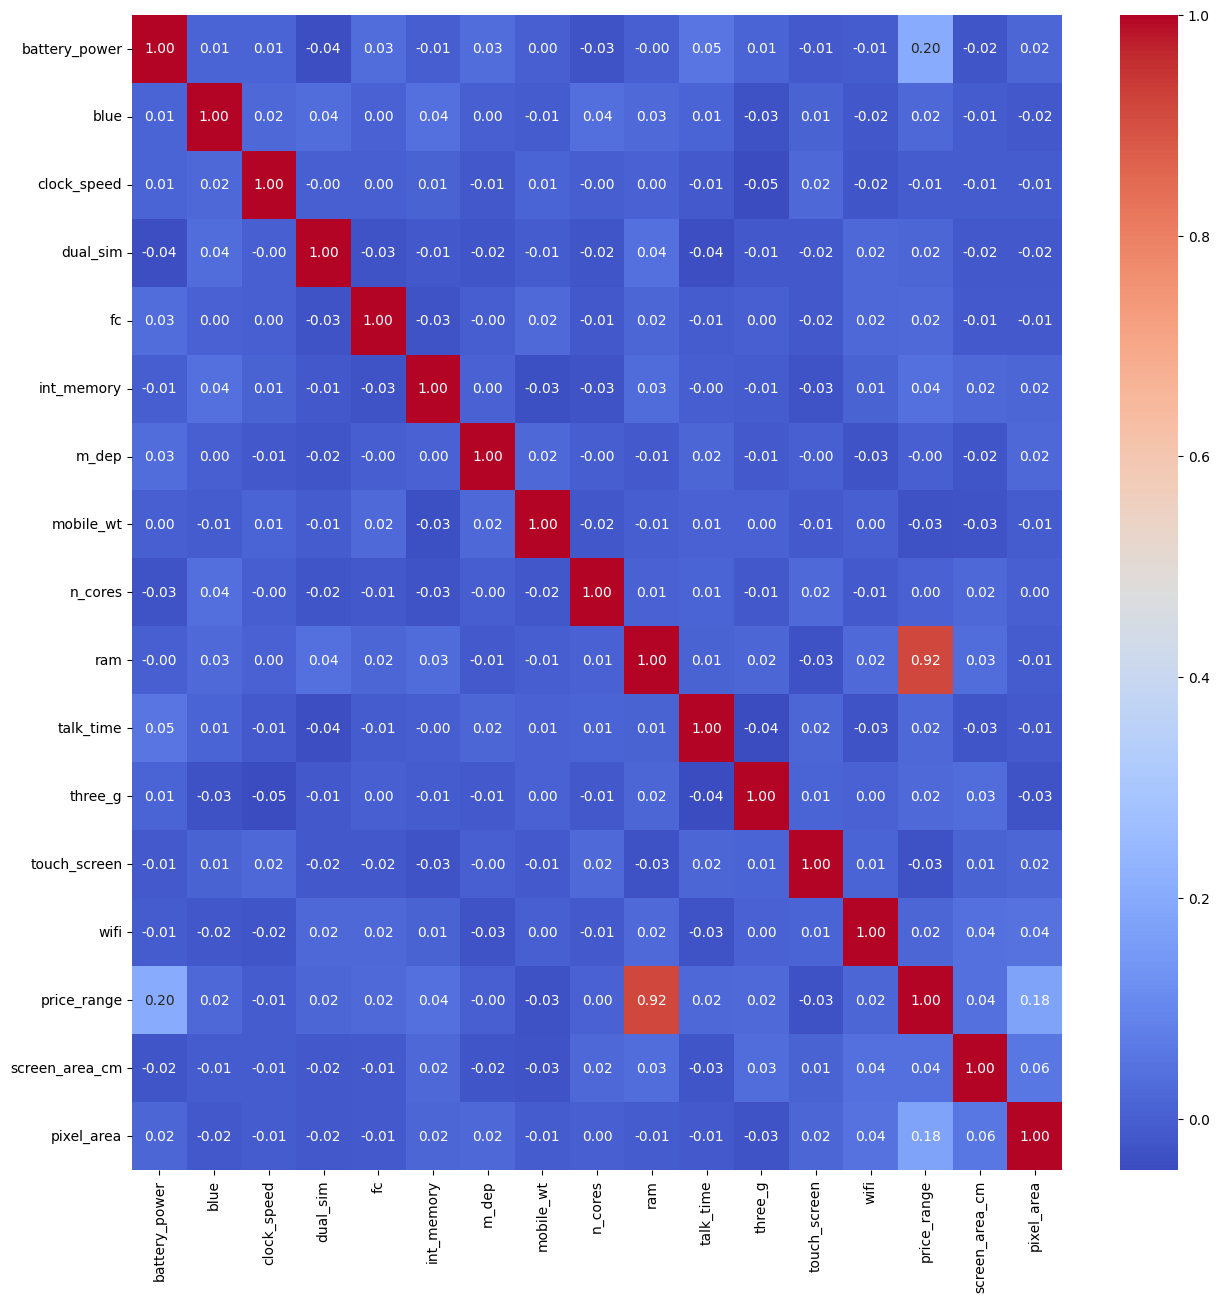

In [34]:
# plot correlation between all features and each other in a big size

import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
corr_matrix = X_scaled_df.corr()

# Set up the figure size
plt.figure(figsize=(15, 15))

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Display the heatmap
plt.show()


In [35]:
# get the correlation between all columns and column price_range

price_range_correlation = X_scaled_df.corr()['price_range'].sort_values(ascending=False)
print(price_range_correlation)


price_range       1.000000
ram               0.916730
battery_power     0.200723
pixel_area        0.175710
int_memory        0.041583
screen_area_cm    0.041402
fc                0.024270
three_g           0.023611
talk_time         0.021859
blue              0.020573
wifi              0.018785
dual_sim          0.017444
n_cores           0.004577
m_dep            -0.000295
clock_speed      -0.006606
touch_screen     -0.030411
mobile_wt        -0.033106
Name: price_range, dtype: float64


In [64]:
X = X_scaled_df.drop(['price_range'], axis=1)
y = X_scaled_df['price_range']

sss = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)


4

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
# Convert continuous target variable to categorical
y = y.astype('int')


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Assuming df is your DataFrame and y are your labels
# Select only the 4 most important features
important_features = ["ram", "battery_power", "pixel_area", "int_memory","screen_area_cm","fc","three_g","talk_time","blue","wifi"]
X_important = X_scaled_df[important_features]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Training Score: ', model.score(X_train, y_train))
print('Testing Score: ', model.score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       288
           1       0.95      0.95      0.95       112

    accuracy                           0.97       400
   macro avg       0.97      0.96      0.97       400
weighted avg       0.97      0.97      0.97       400

Training Score:  0.970625
Testing Score:  0.9725
